In [1]:
import scanpy as sc
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import squidpy as sq
import numpy as np

# Install PASTE2 python package

You can install the paste2 package at https://pypi.org/project/paste2/. We import paste2 as follows:

In [2]:
from paste3 import paste, visualization

# Read in Spatial Transcriptomics slices as AnnData objects

We provide four example ST slices from DLPFC patient 3, cropped to form partially overlapping subslices (See Figure 3A of our paper). Each slice is stored in an [AnnData](https://anndata.readthedocs.io/en/latest/) object.

In [3]:
sliceA_filename = "../../../tests/data/input/151673.h5ad"
sliceB_filename = "../../../tests/data/input/151674.h5ad"
sliceC_filename = "../../../tests/data/input/151675.h5ad"
sliceD_filename = "../../../tests/data/input/151676.h5ad"
sliceA = sc.read_h5ad(sliceA_filename)
sliceB = sc.read_h5ad(sliceB_filename)
sliceC = sc.read_h5ad(sliceC_filename)
sliceD = sc.read_h5ad(sliceD_filename)

Each AnnData object consists of a gene expression matrx and spatial coordinate matrix. The gene expression matrix is stored in the .X field. The spatial coordiante matrix is stored in the .obsm['spatial'] field.

In [4]:
sliceA.X

<Compressed Sparse Row sparse matrix of dtype 'float32'
	with 5798687 stored elements and shape (2929, 11381)>

In [5]:
sliceA.obsm["spatial"]

array([[ 5769,  2807],
       [ 4068,  9505],
       [ 3393,  7583],
       ...,
       [ 4631,  7831],
       [ 5571, 11193],
       [ 6317,  3291]])

The rows of the AnnData objects are spots. The columns are genes.

In [6]:
sliceA.obs

in_tissue  array_row  array_col    imagerow    imagecol  \
AAACAATCTACTAGCA-1.3          1          3         43  126.327637  259.630972   
AAACACCAATAACTGC-1.8          1         59         19  427.767792  183.078314   
AAACAGCTTTCAGAAG-1.7          1         43          9  341.269139  152.700275   
AAACAGGGTCTATATT-1.8          1         47         13  362.916304  164.941500   
AAACAGTGTTCCTGGG-1.5          1         73         43  503.780395  256.930702   
...                         ...        ...        ...         ...         ...   
TTGTTTCACATCCAGG-1.8          1         58         42  422.862301  254.410450   
TTGTTTCATTAGTCTA-1.8          1         60         30  433.393354  217.146722   
TTGTTTCCATACAACT-1.8          1         45         27  352.430255  208.415849   
TTGTTTGTATTACACG-1.4          1         73         41  503.735391  250.720081   
TTGTTTGTGTAAATTC-1.8          1          7         51  148.109816  284.293439   

                      sum_umi  sum_gene subject  position  replicate  ...  \
AAACAATCTACTAGCA-1.3     1667      1150  Br8100         0          1  ...   
AAACACCAATAACTGC-1.8     3769      1960  Br8100         0          1  ...   
AAACAGCTTTCAGAAG-1.7     4278      2264  Br8100         0          1  ...   
AAACAGGGTCTATATT-1.8     4004      2178  Br8100         0          1  ...   
AAACAGTGTTCCTGGG-1.5     2376      1432  Br8100         0          1  ...   
...                       ...       ...     ...       ...        ...  ...   
TTGTTTCACATCCAGG-1.8     4324      2170  Br8100         0          1  ...   
TTGTTTCATTAGTCTA-1.8     2761      1560  Br8100         0          1  ...   
TTGTTTCCATACAACT-1.8     2322      1343  Br8100         0          1  ...   
TTGTTTGTATTACACG-1.4     2331      1420  Br8100         0          1  ...   
TTGTTTGTGTAAATTC-1.8     6281      2927  Br8100         0          1  ...   

                      layer_guess_reordered_short  n_genes_by_counts  \
AAACAATCTACTAGCA-1.3                           L1               1150   
AAACACCAATAACTGC-1.8                           WM               1960   
AAACAGCTTTCAGAAG-1.7                           L5               2264   
AAACAGGGTCTATATT-1.8                           L6               2178   
AAACAGTGTTCCTGGG-1.5                           WM               1432   
...                                           ...                ...   
TTGTTTCACATCCAGG-1.8                           WM               2170   
TTGTTTCATTAGTCTA-1.8                           WM               1560   
TTGTTTCCATACAACT-1.8                           L6               1343   
TTGTTTGTATTACACG-1.4                           WM               1420   
TTGTTTGTGTAAATTC-1.8                           L2               2927   

                     log1p_n_genes_by_counts total_counts log1p_total_counts  \
AAACAATCTACTAGCA-1.3                7.048386       1667.0           7.419381   
AAACACCAATAACTGC-1.8                7.581210       3769.0           8.234830   
AAACAGCTTTCAGAAG-1.7                7.725330       4278.0           8.361475   
AAACAGGGTCTATATT-1.8                7.686621       4004.0           8.295299   
AAACAGTGTTCCTGGG-1.5                7.267525       2376.0           7.773594   
...                                      ...          ...                ...   
TTGTTTCACATCCAGG-1.8                7.682943       4324.0           8.372168   
TTGTTTCATTAGTCTA-1.8                7.353082       2761.0           7.923710   
TTGTTTCCATACAACT-1.8                7.203406       2322.0           7.750615   
TTGTTTGTATTACACG-1.4                7.259116       2331.0           7.754481   
TTGTTTGTGTAAATTC-1.8                7.982075       6281.0           8.745443   

                      pct_counts_in_top_50_genes  pct_counts_in_top_100_genes  \
AAACAATCTACTAGCA-1.3                   22.975405                    30.173965   
AAACACCAATAACTGC-1.8                   25.975060                    33.138764   
AAACAGCTTTCAGAAG-1.7                   23.796166       

In [7]:
sliceA.var

gene_ids    feature_types  genome  n_cells_by_counts  \
NOC2L       ENSG00000188976  Gene Expression  GRCh38                690   
KLHL17      ENSG00000187961  Gene Expression  GRCh38                163   
HES4        ENSG00000188290  Gene Expression  GRCh38                875   
ISG15       ENSG00000187608  Gene Expression  GRCh38                968   
AGRN        ENSG00000188157  Gene Expression  GRCh38               1038   
...                     ...              ...     ...                ...   
MT-ND4      ENSG00000198886  Gene Expression  GRCh38               3639   
MT-ND5      ENSG00000198786  Gene Expression  GRCh38               3593   
MT-ND6      ENSG00000198695  Gene Expression  GRCh38               1966   
MT-CYB      ENSG00000198727  Gene Expression  GRCh38               3639   
AC007325.4  ENSG00000278817  Gene Expression  GRCh38                577   

            mean_counts  log1p_mean_counts  pct_dropout_by_counts  \
NOC2L          0.223963           0.202094              81.038747   
KLHL17         0.045342           0.044344              95.520747   
HES4           0.303105           0.264750              75.954933   
ISG15          0.318494           0.276490              73.399286   
AGRN           0.351470           0.301193              71.475680   
...                 ...                ...                    ...   
MT-ND4        85.596596           4.461260               0.000000   
MT-ND5         9.799670           2.379516               1.264084   
MT-ND6         0.860126           0.620644              45.974169   
MT-CYB        49.170376           3.915425               0.000000   
AC007325.4     0.183567           0.168533              84.143996   

            total_counts  log1p_total_counts  n_counts  
NOC2L              815.0            6.704414     815.0  
KLHL17             165.0            5.111988     165.0  
HES4              1103.0            7.006695    1103.0  
ISG15             1159.0            7.056175    1159.0  
AGRN              1279.0            7.154615    1279.0  
...                  ...                 ...       ...  
MT-ND4          311486.0           12.649113  311486.0  
MT-ND5           35661.0           10.481841   35661.0  
MT-ND6            3130.0            8.049108    3130.0  
MT-CYB          178931.0           12.094761  178931.0  
AC007325.4         668.0            6.505784     668.0  

[11381 rows x 10 columns]

We can visualize the slices using [squidpy](https://squidpy.readthedocs.io/en/stable/index.html). In this case, the .obs["layer_guess_reordered"] field stores the layer annotation of each slice, so we use this field to color each spot.

/opt/hostedtoolcache/Python/3.12.7/x64/lib/python3.12/site-packages/squidpy/pl/_spatial_utils.py:981: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  _cax = scatter(


/opt/hostedtoolcache/Python/3.12.7/x64/lib/python3.12/site-packages/squidpy/pl/_spatial_utils.py:981: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  _cax = scatter(
/opt/hostedtoolcache/Python/3.12.7/x64/lib/python3.12/site-packages/squidpy/pl/_spatial_utils.py:981: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  _cax = scatter(
/opt/hostedtoolcache/Python/3.12.7/x64/lib/python3.12/site-packages/squidpy/pl/_spatial_utils.py:981: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  _cax = scatter(


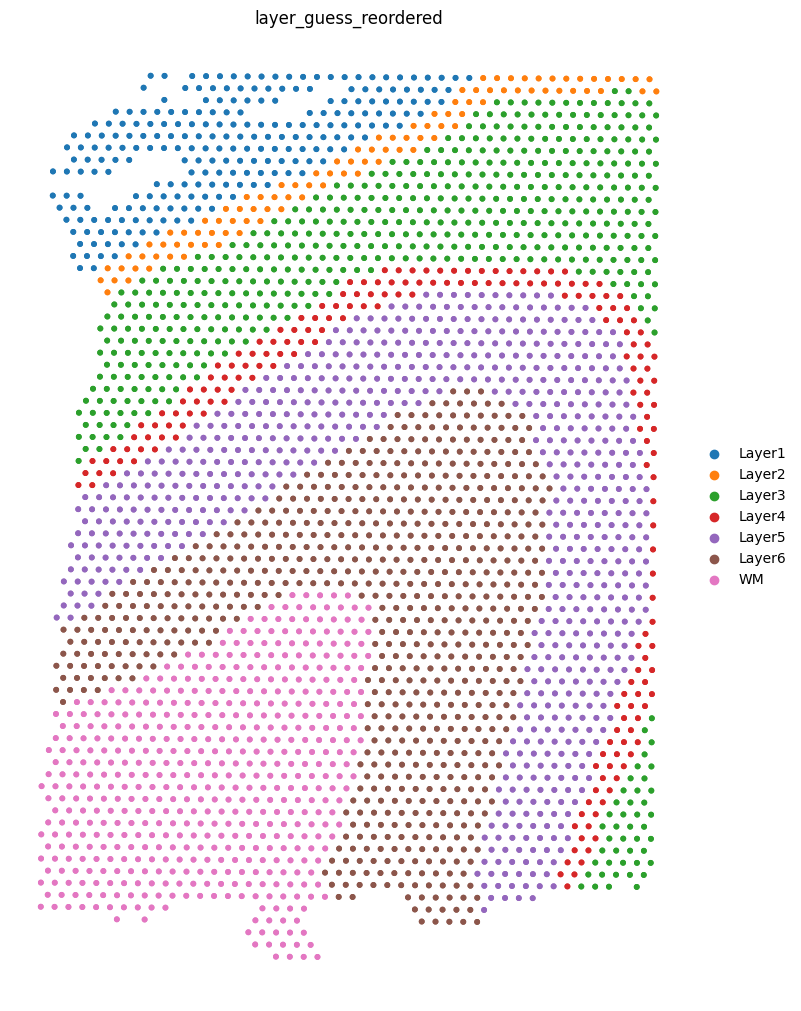

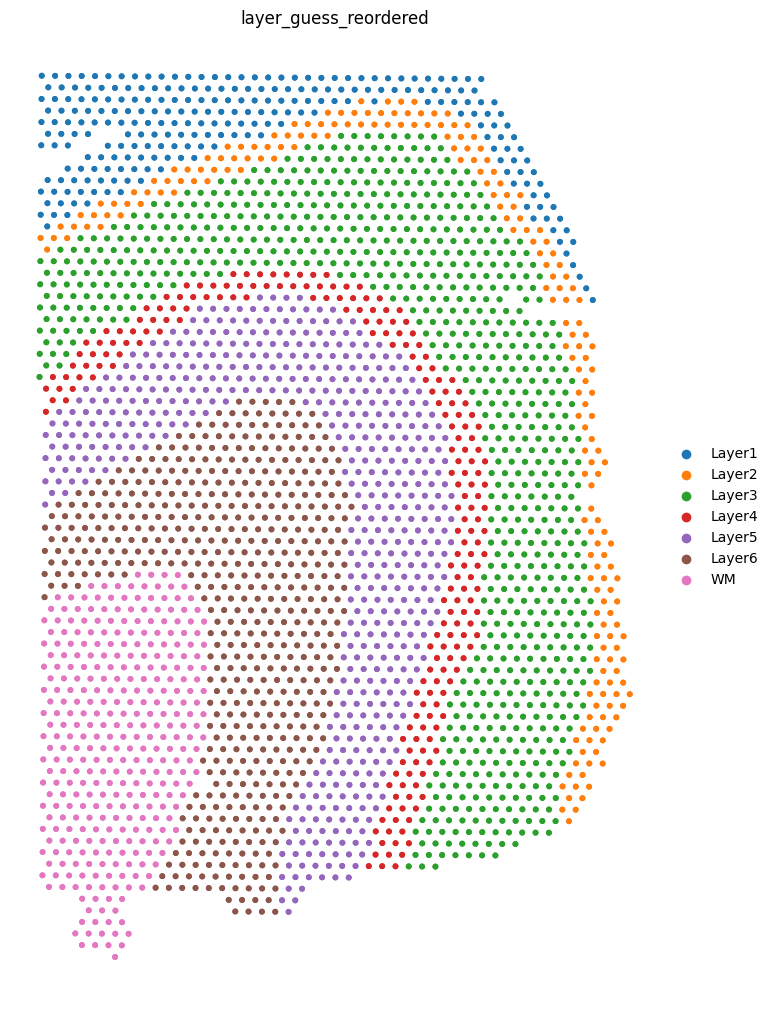

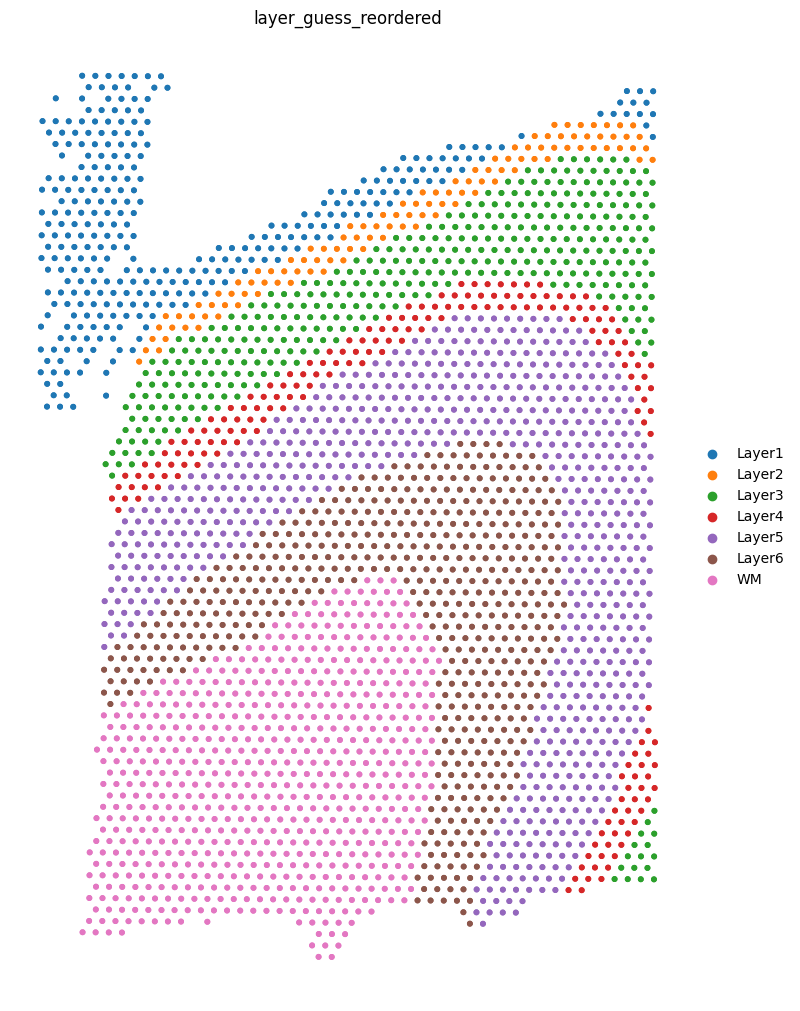

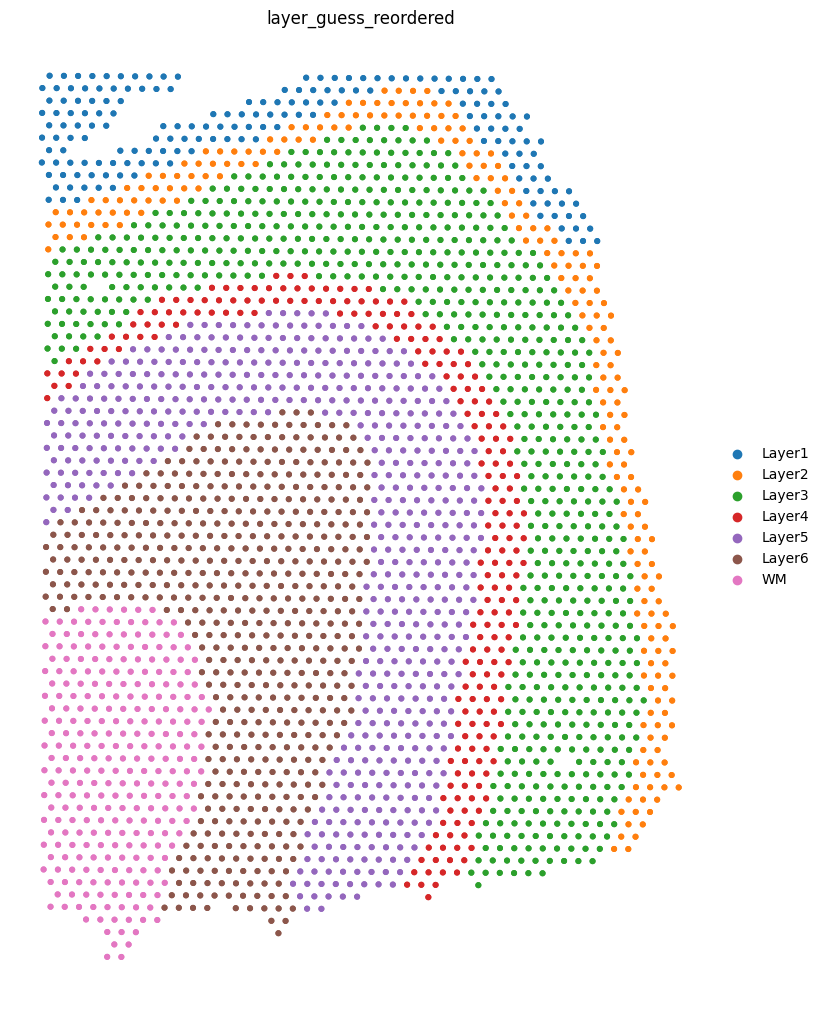

In [8]:
sq.pl.spatial_scatter(
    sliceA, frameon=False, shape=None, color="layer_guess_reordered", figsize=(10, 10)
)
sq.pl.spatial_scatter(
    sliceB, frameon=False, shape=None, color="layer_guess_reordered", figsize=(10, 10)
)
sq.pl.spatial_scatter(
    sliceC, frameon=False, shape=None, color="layer_guess_reordered", figsize=(10, 10)
)
sq.pl.spatial_scatter(
    sliceD, frameon=False, shape=None, color="layer_guess_reordered", figsize=(10, 10)
)

# Compute partial pairwise alignment using PASTE2

Give a pair of partially overlapping slices, we can use PASTE2.partial_pairwise_align( ) to find an alignment matrix. To call the function, you need to input the AnnData objects of the two slices, as well as a parameter s, which indicates the overlap percentage of the two slices. In this tutorial, each pair of cropped subslices overlap at 70% of the areas, so we set s=0.7. For your own datasets you should visualize the slices and manually determine the approxiamte overlap percentage (this parameter does not have to be very accurate).

Now we compute an alignment matrix between each pair of slices in our example dataset.

**In the calls to `paste3.pairwise_align` below, we're using maxIter=20 here to specify a maximum of 20 iterations for pairwise_align. This is only to allow this demo to run in a resonable amount of time. In a real alignment scenario, you should not include this argument**.

In [9]:
pi_AB = paste.pairwise_align(sliceA, sliceB, s=0.7, verbose=True, maxIter=20)

gpu is not available, resorting to torch cpu.


It.  |Loss        |Relative loss|Absolute loss
------------------------------------------------
    0|6.710936e+05|0.000000e+00|0.000000e+00


    1|1.506319e+05|3.455189e+00|5.204617e+05


    2|1.238256e+05|2.164846e-01|2.680633e+04


    3|6.923948e+02|1.778367e+02|1.231332e+05


    4|1.612673e+02|3.293459e+00|5.311275e+02


    5|1.036878e+02|5.553170e-01|5.757958e+01


    6|9.628783e+01|7.685230e-02|7.399941e+00


    7|9.490113e+01|1.461199e-02|1.386694e+00


    8|9.447809e+01|4.477653e-03|4.230401e-01


    9|9.426817e+01|2.226887e-03|2.099246e-01


   10|9.412880e+01|1.480568e-03|1.393641e-01


   11|9.401390e+01|1.222206e-03|1.149044e-01


   12|9.387215e+01|1.510049e-03|1.417515e-01


   13|9.368199e+01|2.029792e-03|1.901550e-01


   14|9.354138e+01|1.503231e-03|1.406143e-01


   15|9.337966e+01|1.731836e-03|1.617183e-01


   16|9.318966e+01|2.038891e-03|1.900035e-01


   17|9.300270e+01|2.010222e-03|1.869561e-01


   18|9.286744e+01|1.456511e-03|1.352624e-01


   19|9.276268e+01|1.129271e-03|1.047542e-01


It.  |Loss        |Relative loss|Absolute loss
------------------------------------------------
   20|9.267311e+01|9.664996e-04|8.956853e-02


In [10]:
pi_BC = paste.pairwise_align(sliceB, sliceC, s=0.7, verbose=True, maxIter=20)

gpu is not available, resorting to torch cpu.


It.  |Loss        |Relative loss|Absolute loss
------------------------------------------------
    0|6.804110e+05|0.000000e+00|0.000000e+00


    1|1.488760e+05|3.570319e+00|5.315350e+05


    2|9.497996e+04|5.674468e-01|5.389608e+04


    3|2.860614e+02|3.310265e+02|9.469390e+04


    4|1.158294e+02|1.469678e+00|1.702320e+02


    5|1.027988e+02|1.267584e-01|1.303062e+01


    6|1.019380e+02|8.445037e-03|8.608699e-01


    7|1.017369e+02|1.976298e-03|2.010624e-01


    8|1.015294e+02|2.043557e-03|2.074812e-01


    9|1.013558e+02|1.712961e-03|1.736186e-01


   10|1.012657e+02|8.895452e-04|9.008043e-02


   11|1.011790e+02|8.569254e-04|8.670287e-02


   12|1.011412e+02|3.742049e-04|3.784752e-02


   13|1.010967e+02|4.398542e-04|4.446781e-02


   14|1.010752e+02|2.123120e-04|2.145948e-02


   15|1.010698e+02|5.388456e-05|5.446102e-03


   16|1.010680e+02|1.752777e-05|1.771497e-03


   17|1.010673e+02|7.010478e-06|7.085302e-04


   18|1.010653e+02|2.012973e-05|2.034416e-03


   19|1.010635e+02|1.776262e-05|1.795153e-03


It.  |Loss        |Relative loss|Absolute loss
------------------------------------------------
   20|1.010617e+02|1.787045e-05|1.806018e-03


In [11]:
pi_CD = paste.pairwise_align(sliceC, sliceD, s=0.7, verbose=True, maxIter=20)

gpu is not available, resorting to torch cpu.


It.  |Loss        |Relative loss|Absolute loss
------------------------------------------------
    0|6.529668e+05|0.000000e+00|0.000000e+00


    1|1.442923e+05|3.525307e+00|5.086745e+05


    2|6.886358e+04|1.095335e+00|7.542871e+04


    3|1.240290e+04|4.552214e+00|5.646067e+04


    4|9.109203e+03|3.615795e-01|3.293701e+03


    5|5.520135e+03|6.501777e-01|3.589068e+03


    6|1.797249e+03|2.071437e+00|3.722886e+03


    7|1.894985e+02|8.484237e+00|1.607750e+03


    8|1.078161e+02|7.576080e-01|8.168236e+01


    9|1.018284e+02|5.880255e-02|5.987768e+00


   10|1.014573e+02|3.657573e-03|3.710874e-01


   11|1.013755e+02|8.065806e-04|8.176752e-02


   12|1.013384e+02|3.661851e-04|3.710862e-02


   13|1.013159e+02|2.217978e-04|2.247165e-02


   14|1.012949e+02|2.077882e-04|2.104788e-02


   15|1.012803e+02|1.434630e-04|1.452998e-02


   16|1.012392e+02|4.062498e-04|4.112842e-02


   17|1.011751e+02|6.340940e-04|6.415450e-02


   18|1.011231e+02|5.139540e-04|5.197261e-02


   19|1.010540e+02|6.840244e-04|6.912338e-02


It.  |Loss        |Relative loss|Absolute loss
------------------------------------------------
   20|1.010113e+02|4.226887e-04|4.269633e-02


Let's check the shape of each alignment matrix. For aligning a slice with n1 spots and a slice with n2 spots, the alignment matrix should be of shape (n1 * n2)

In [12]:
print(pi_AB.shape)
print(pi_BC.shape)
print(pi_CD.shape)

torch.Size([2929, 2877])
torch.Size([2877, 2873])
torch.Size([2873, 2701])


There are other optional parameters to PASTE2.partial_pairwise_align() as well. You can checkout the original function signature in the souce code with documentation.

Let's visualize the alignment between sliceA and sliceB:

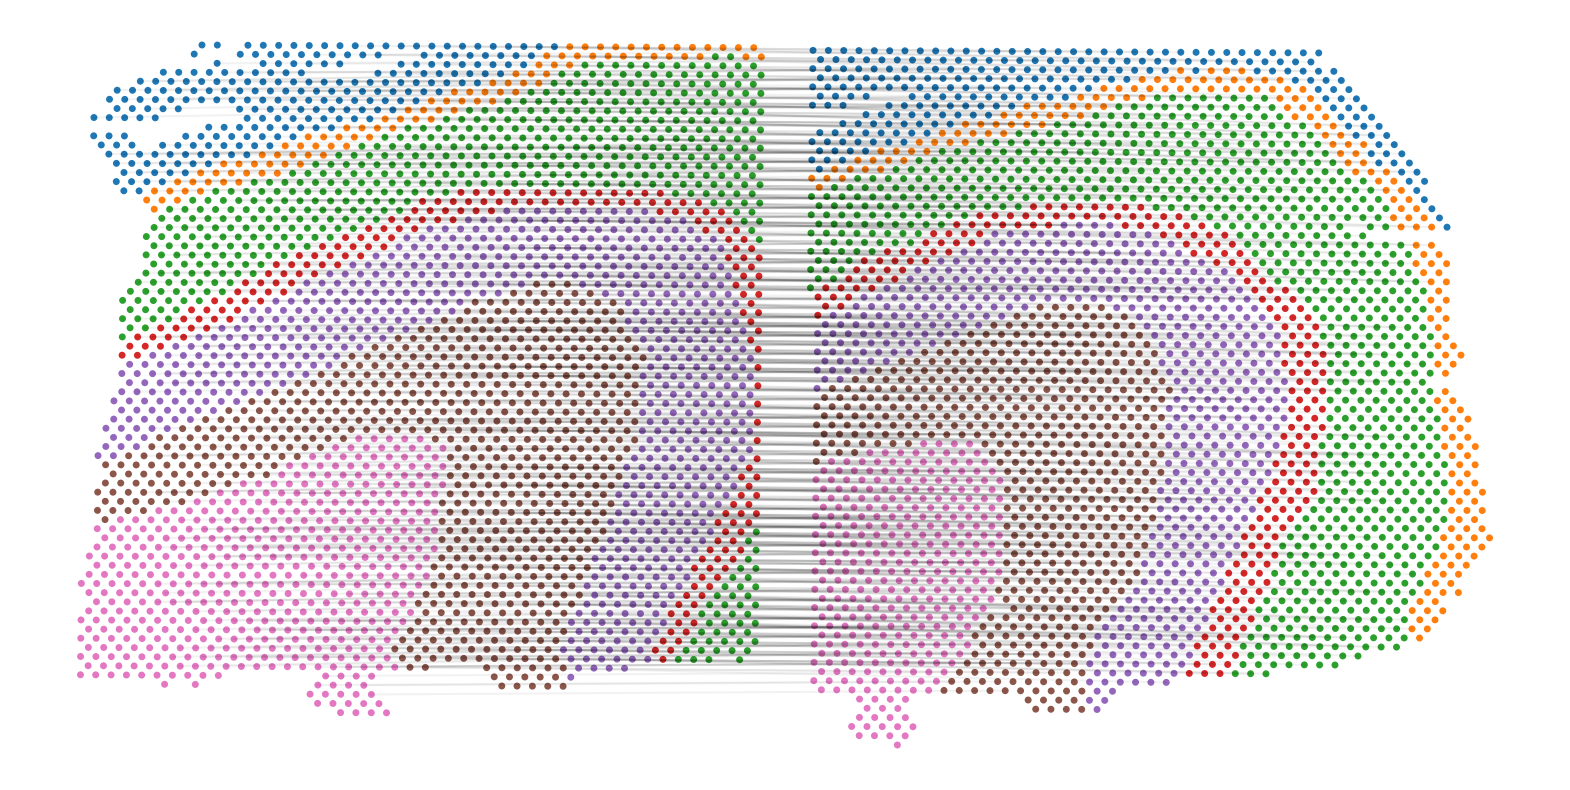

In [13]:
def largest_indices(ary, n):
    """Returns the n largest indices from a numpy array."""
    flat = ary.flatten()
    indices = np.argpartition(flat, -n)[-n:]
    indices = indices[np.argsort(-flat[indices])]
    return np.unravel_index(indices, ary.shape)


def plot2D_samples_mat(
    xs, xt, G, thr=1e-8, alpha=0.2, top=1000, weight_alpha=False, **kwargs
):
    if ("color" not in kwargs) and ("c" not in kwargs):
        kwargs["color"] = "k"
    mx = G.max().item()
    #     idx = np.where(G/mx>=thr)
    idx = largest_indices(G.cpu().numpy(), top)
    for i in range(len(idx[0])):
        plt.plot(
            [xs[idx[0][i], 0], xt[idx[1][i], 0]],
            [xs[idx[0][i], 1], xt[idx[1][i], 1]],
            alpha=alpha * (1 - weight_alpha)
            + (weight_alpha * G[idx[0][i], idx[1][i]].item() / mx),
            c="k",
        )


def plot_slice_pairwise_alignment(
    slice1, slice2, pi, thr=1 - 1e-8, alpha=0.05, top=1000, name="", weight_alpha=False
):
    coordinates1, coordinates2 = slice1.obsm["spatial"], slice2.obsm["spatial"]
    offset = (coordinates1[:, 0].max() - coordinates2[:, 0].min()) * 1.1
    temp = np.zeros(coordinates2.shape)
    temp[:, 0] = offset
    plt.figure(figsize=(20, 10))
    plot2D_samples_mat(
        coordinates1,
        coordinates2 + temp,
        pi,
        thr=thr,
        c="k",
        alpha=alpha,
        top=top,
        weight_alpha=weight_alpha,
    )
    plt.scatter(
        coordinates1[:, 0],
        coordinates1[:, 1],
        linewidth=0,
        s=100,
        marker=".",
        color=list(
            slice1.obs["layer_guess_reordered"].map(
                dict(
                    zip(
                        slice1.obs["layer_guess_reordered"].cat.categories,
                        slice1.uns["layer_guess_reordered_colors"],
                    )
                )
            )
        ),
    )
    plt.scatter(
        coordinates2[:, 0] + offset,
        coordinates2[:, 1],
        linewidth=0,
        s=100,
        marker=".",
        color=list(
            slice2.obs["layer_guess_reordered"].map(
                dict(
                    zip(
                        slice2.obs["layer_guess_reordered"].cat.categories,
                        slice2.uns["layer_guess_reordered_colors"],
                    )
                )
            )
        ),
    )
    plt.gca().invert_yaxis()
    plt.axis("off")
    plt.show()


plot_slice_pairwise_alignment(sliceA, sliceB, pi_AB)

# Project all slices onto the same coordiante system according to the alignment

Once the alignment matrix between each pair of adjacent slices in a sequence of consecutive slices are computed, we can use this information to project all slices onto the same 2D coordinate system. 3D reconstruction can be done by assiging a z-coordiante to each slice after the projection.

Specifically, we use visualization.partial_stack_slices_pairwise( ):

In [14]:
pis = [pi_AB, pi_BC, pi_CD]
slices = [sliceA, sliceB, sliceC, sliceD]

new_slices = visualization.stack_slices_pairwise(slices, pis, is_partial=True)

Now let's plot the coordinates of all slices after the projection:

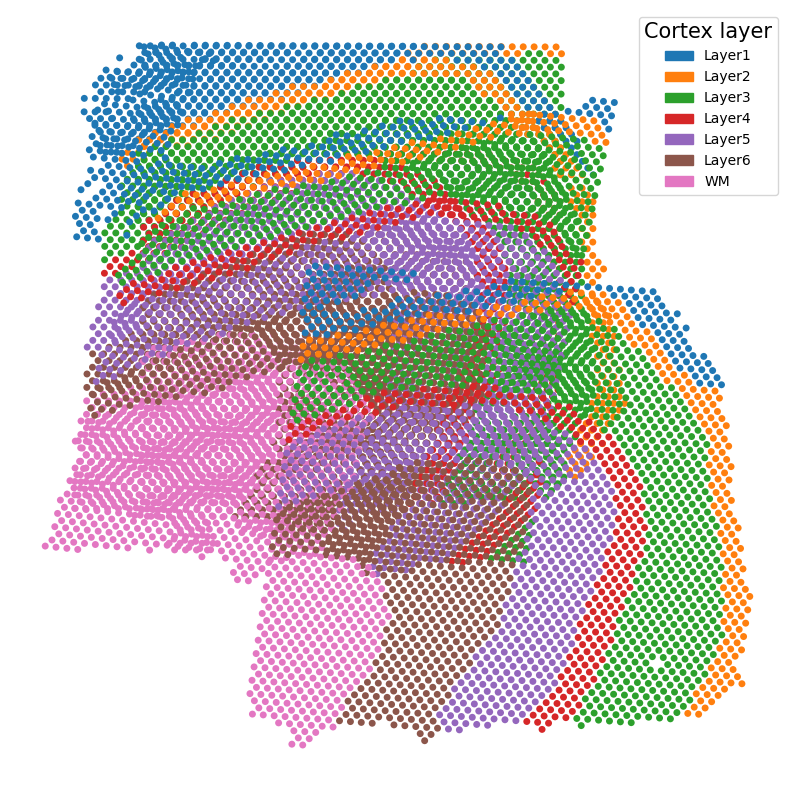

In [15]:
layer_to_color_map = {
    "Layer{0}".format(i + 1): sns.color_palette()[i] for i in range(6)
}
layer_to_color_map["WM"] = sns.color_palette()[6]


def plot_slices_overlap(slices, layer_to_color_map=layer_to_color_map):
    plt.figure(figsize=(10, 10))
    for i in range(len(slices)):
        adata = slices[i]
        colors = list(
            adata.obs["layer_guess_reordered"].astype("str").map(layer_to_color_map)
        )
        plt.scatter(
            adata.obsm["spatial"][:, 0],
            adata.obsm["spatial"][:, 1],
            linewidth=0,
            s=100,
            marker=".",
            color=colors,
        )
    plt.legend(
        handles=[
            mpatches.Patch(
                color=layer_to_color_map[
                    adata.obs["layer_guess_reordered"].cat.categories[i]
                ],
                label=adata.obs["layer_guess_reordered"].cat.categories[i],
            )
            for i in range(len(adata.obs["layer_guess_reordered"].cat.categories))
        ],
        fontsize=10,
        title="Cortex layer",
        title_fontsize=15,
        bbox_to_anchor=(1, 1),
    )
    plt.gca().invert_yaxis()
    plt.axis("off")
    plt.show()


plot_slices_overlap(new_slices)

Or just the first two, which reproduces Figure 3C of the paper:

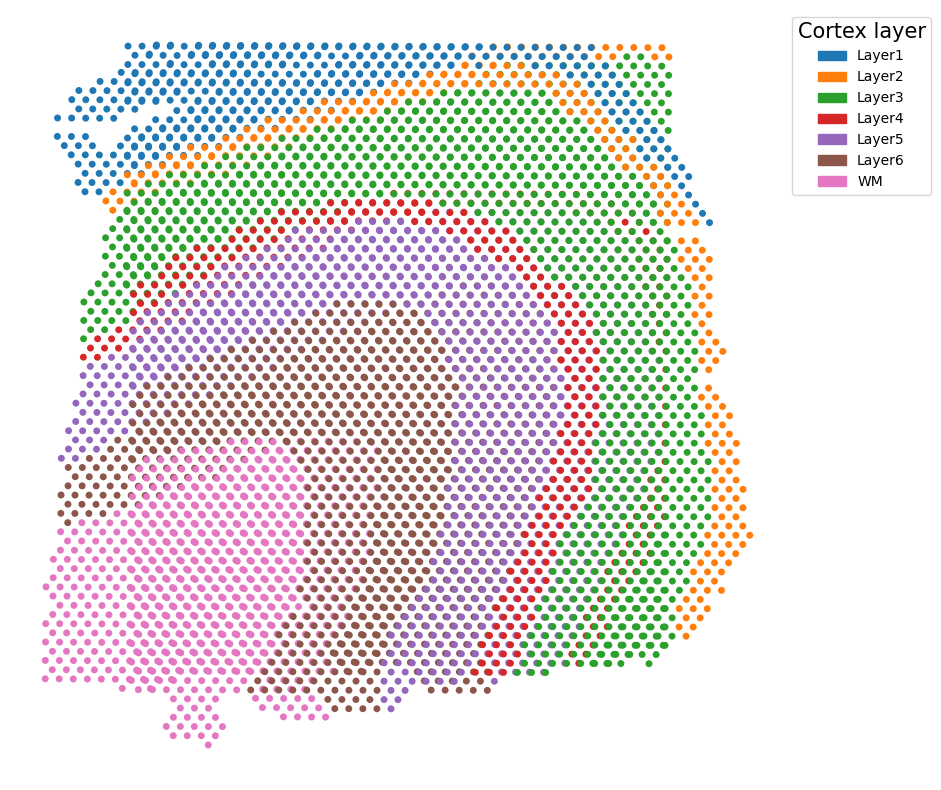

In [16]:
plot_slices_overlap(new_slices[:2])